In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
x=[]
y=[]
for i in range(10):
    x.append([2+np.random.rand(), 2+np.random.rand(),1])
    y.append([0,1])
    
for i in range(10):
    x.append([-2+np.random.rand(), -2+np.random.rand(),1])
    y.append([1,0])

In [3]:
x=np.array(x)
y=np.array(y)

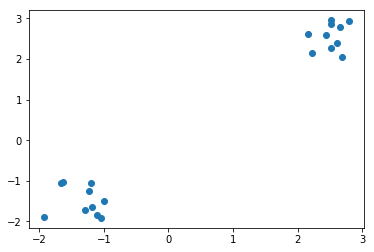

In [4]:
plt.plot(x[:,0],x[:,1],'o')

# Network

In [5]:
def g(x):    
    return 1/(1+np.exp(-x))

def grad_g(g):
    return (1-g)*g

In [35]:
np.random.seed(1)
wb0 = 2*np.random.random((3,2))-1
wb1 = 2*np.random.random((2,2))-1
a=[]

In [36]:
for i in range(100):
    z0=np.dot(x,wb0)
    a1=g(z0)
    z1=np.dot(a1,wb1)
    a2=g(z1)
    
    delta_a2=y-a2
    delta_z1=delta_a2*grad_g(a2)
    
    wb1 +=  a1.T.dot(delta_z1)
    
    delta_a1=delta_z1.dot(wb1.T)
    delta_z0=delta_a1*grad_g(a1)
    
    wb0 += x.T.dot(delta_z0)
    
    #if(i % 10000) == 0:   # Only print the error every 10000 steps 
        #print("Error: " + str(np.mean(np.abs(delta_a2))))
    a.append(np.mean(np.abs(delta_a2)))

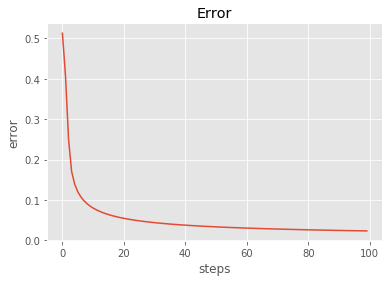

In [39]:
b=np.arange(0, 100, 1)
plt.style.use('ggplot')
plt.plot(b,a)
plt.title('Error')
plt.xlabel('steps')
plt.ylabel('error')